In [1]:
from __future__ import print_function
import keras,sklearn
# suppress tensorflow compilation warnings
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist, mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

TrainSize = 60000
TestSize = 10000

img_rows, img_cols = 28, 28 # number of pixels 
num_classes = 10
# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, depending on Keras backend
X_train = X_train.reshape(TrainSize, img_rows,img_cols)
X_test = X_test.reshape(TestSize, img_rows,img_cols)
    
# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

TrainNoise = np.random.rand(60000,28,28)
TestNoise = np.random.rand(10000,28,28)

X_train_noisy = X_train + TrainNoise*2
X_test_noisy = X_test + TestNoise*2


# look at an example of data point


# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
    X_train_noisy = X_train_noisy.reshape(X_train_noisy.shape[0], 1, img_rows, img_cols)
    X_test_noisy = X_test_noisy.reshape(X_test_noisy.shape[0], 1, img_rows, img_cols)

else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    
    X_train_noisy = X_train_noisy.reshape(X_train_noisy.shape[0], img_rows, img_cols, 1)
    X_test_noisy = X_test_noisy.reshape(X_test_noisy.shape[0], img_rows, img_cols, 1)
    
    
    input_shape = (img_rows, img_cols, 1)
    
# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)





Using TensorFlow backend.
C:\Users\adamj\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\adamj\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\adamj\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\adamj\AppData\Roa

In [2]:
def create_CNN():
    # instantiate model
    model = Sequential()
    
    model.add(Conv2D(5, kernel_size=(2, 2),padding='same',
                     activation='relu',
                     input_shape=input_shape))
    #model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Conv2D(1, (2, 2), padding='same',activation='relu'))
    # compile the model
    model.compile(loss='mean_squared_error',
                  optimizer='Adam',
                  metrics=['accuracy'])
    
    model.summary()
    
    return model

# training parameters
batch_size = 30
epochs = 5

# get output from intermediate layer
model_CNN=create_CNN()

print('Model compiled successfully and ready to be trained.')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 5)         25        
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         21        
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
Model compiled successfully and ready to be trained.


In [3]:
# train CNN
model_CNN.fit(X_train_noisy, X_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_noisy, X_test))

# evaluate model
score = model_CNN.evaluate(X_test_noisy, X_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 26s 436us/step - loss: 0.1224 - acc: 0.7945 - val_loss: 0.1140 - val_acc: 0.8072
Epoch 2/5
60000/60000 [==============================] - 28s 470us/step - loss: 0.1065 - acc: 0.8080 - val_loss: 0.0545 - val_acc: 0.8088
Epoch 3/5
60000/60000 [==============================] - 28s 474us/step - loss: 0.0580 - acc: 0.8080 - val_loss: 0.0452 - val_acc: 0.8099
Epoch 4/5
60000/60000 [==============================] - 29s 477us/step - loss: 0.0523 - acc: 0.8095 - val_loss: 0.0413 - val_acc: 0.8101
Epoch 5/5
10000/10000 [==============================] - 2s 207us/step

Test loss: 0.04168524315357208
Test accuracy: 0.810155103969574


In [4]:
get_2nd_layer_output = K.function([model_CNN.layers[0].input],
                                  [model_CNN.layers[2].output])
layer_output = get_2nd_layer_output([X_test_noisy])[0]



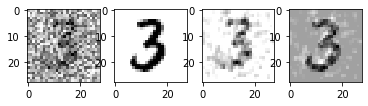

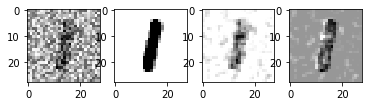

In [5]:
## visualize testing
X_test_plot=X_test.reshape(10000,28,28)
X_test_noisy_plot=X_test_noisy.reshape(10000,28,28)
plotout=layer_output.reshape(10000,28,28)

showNo1 = 3487;
showNo2 = 8100;
X_test_res = X_test_plot - plotout
fig,axarr = plt.subplots(nrows=1, ncols=4)
axarr[0].imshow(X_test_noisy_plot[showNo1,:],cmap='binary')
axarr[1].imshow(X_test_plot[showNo1,:],cmap='binary')
axarr[2].imshow(plotout[showNo1,:],cmap='binary')
axarr[3].imshow(X_test_res[showNo1,:],cmap='binary')

plt.show()

fig,axarr = plt.subplots(nrows=1, ncols=4)
axarr[0].imshow(X_test_noisy_plot[showNo2,:],cmap='binary')
axarr[1].imshow(X_test_plot[showNo2,:],cmap='binary')
axarr[2].imshow(plotout[showNo2,:],cmap='binary')
axarr[3].imshow(X_test_res[showNo2,:],cmap='binary')
plt.show()


In [6]:


## visualize training
X_train_plot=X_train.reshape(60000,28,28)
X_train_noisy_plot=X_train_noisy.reshape(60000,28,28)
plotout=layer_output.reshape(60000,28,28)

showNo1 = 34876;
showNo2 = 4000;

X_train_res = X_train_plot - plotout
fig,axarr = plt.subplots(nrows=1, ncols=4)
axarr[0].imshow(X_train_noisy_plot[showNo1,:],cmap='binary')
axarr[1].imshow(X_train_plot[showNo1,:],cmap='binary')
axarr[2].imshow(plotout[showNo1,:],cmap='binary')
axarr[3].imshow(X_train_res[showNo1,:],cmap='binary')

plt.show()

fig,axarr = plt.subplots(nrows=1, ncols=4)
axarr[0].imshow(X_train_noisy_plot[showNo2,:],cmap='binary')
axarr[1].imshow(X_train_plot[showNo2,:],cmap='binary')
axarr[2].imshow(plotout[showNo2,:],cmap='binary')
axarr[3].imshow(X_train_res[showNo2,:],cmap='binary')
plt.show()

ValueError: cannot reshape array of size 7840000 into shape (60000,28,28)